### 1. Understand PredRNN MNIST Moving Data Structure
- https://www.heywhale.com/mw/project/66431c05ddbc61be6513d9d8
- https://www.heywhale.com/mw/project/66431c05ddbc61be6513d9d8

以moving-mnist-train.npz为例，其结构详细说明：

### Data Details
- **clips.npy**表示输入帧（Input）和真实帧（Ground Truth）所在的图片位置，1w个视频各自分成20帧，就有2w张图。
    - clips[0]的[0,10]表示从索引0开始数10张作为第一个输入帧，
    - 以此类推，[20,10]表示从20往后数10张作为输入帧，[199980,10]表示从199980开始数10张作为输入帧。同理剩下的图片则作为gt帧。
- **dims**表示输入数据的大小size。
- **input_raw_data**包含了1w个视频每一帧的图片，存储类型为np.ndarray，可以直接用opencv或matplotlib等python库可视化，64*64表示一张图片，一共20w张。

In [1]:
import numpy as np

In [2]:
train_data = np.load(r'D:\Tommy\++AI\++datasets\mnist\movingmnist\moving-mnist-train.npz')
print(train_data['clips'].shape)
print(train_data['dims'].shape)
print(train_data['input_raw_data'].shape)

(2, 10000, 2)
(1, 3)
(200000, 1, 64, 64)


### 2. Details of each layer

### 2.1 Layer "clips"
- 1 clip means one video clip includes 20 frames, 10 as inputs and 10 as target for training
- shape: (2, 10000, 2)

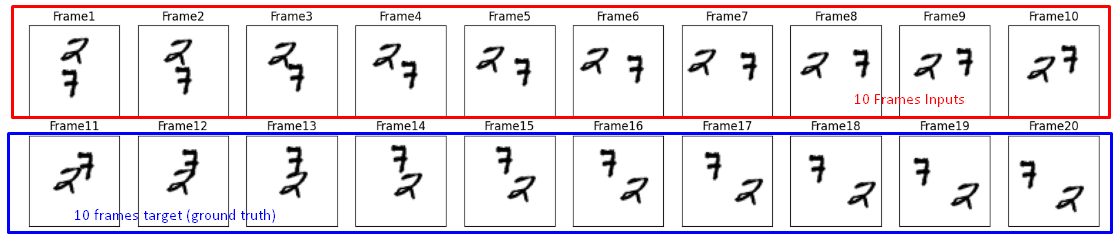

- train_clips[**0**,:,:], input 10 frames
- train_clips[**1**,:,:], 10 frames ground truth (targets). also the frames after the 10 input frames

In [3]:
train_clips = train_data['clips']
print("Input: \n", train_clips[0,:,:])
print("Ground Truth: \n", train_clips[1,:,:])

Input: 
 [[     0     10]
 [    20     10]
 [    40     10]
 ...
 [199940     10]
 [199960     10]
 [199980     10]]
Ground Truth: 
 [[    10     10]
 [    30     10]
 [    50     10]
 ...
 [199950     10]
 [199970     10]
 [199990     10]]


In [4]:
# index of train dataset
n=5

In [5]:
print("Input 0 start pos: \n", train_clips[0,n,0])
print("Input 0 length of images: \n", train_clips[0,n,1])

Input 0 start pos: 
 100
Input 0 length of images: 
 10


In [6]:
print("Target 0 start pos: \n", train_clips[1,n,0])
print("Target 0 length of images: \n", train_clips[1,n,1])

Target 0 start pos: 
 110
Target 0 length of images: 
 10


### 2.2 Layer "dims"

- shape: (1, 3)
- final data is a 3 elements array shows image channel(1) and image size(64x64) 

In [7]:
train_dims = train_data['dims']

In [8]:
train_dims[0,:]

array([ 1, 64, 64])

In [9]:
train_dims[0,0]

1

### 2.3 Layer "input_raw_data"
- shape: (200000, 1, 64, 64)
- 1 clip means one video clip includes 20 frames, 10 as inputs and 10 as target for training
- Total 200,000 images (frames)
    - there are **10,000 video clips** (from train_data['clips'])
    - each clip includes **20 frames**
    - 10,000 x 20 = 200,000 images (frames)
- image size is (1,64,64)

In [10]:
train_raw = train_data['input_raw_data']

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

#### first 20 frames

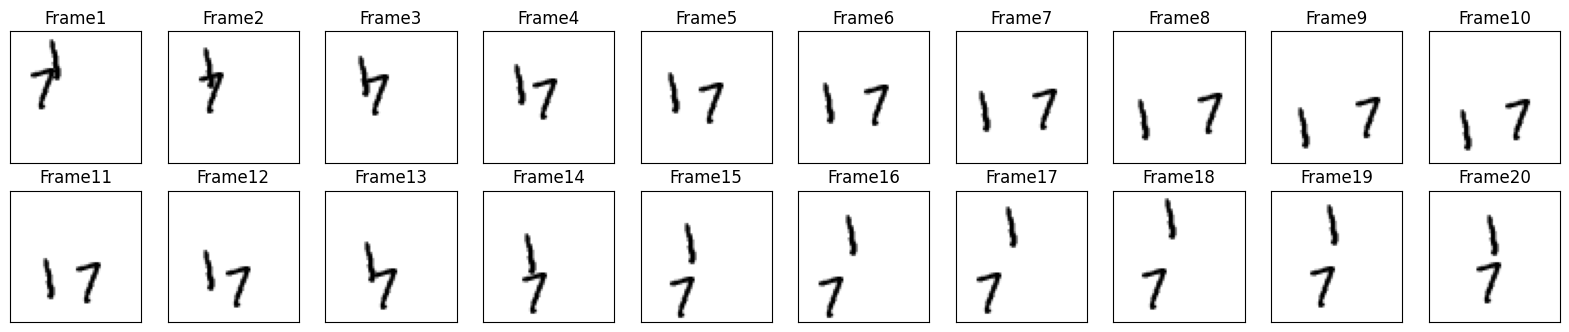

In [12]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_raw[i,0,:,:], cmap=plt.cm.binary)
    plt.title('Frame'+str(i+1))
plt.show()

#### 10th set

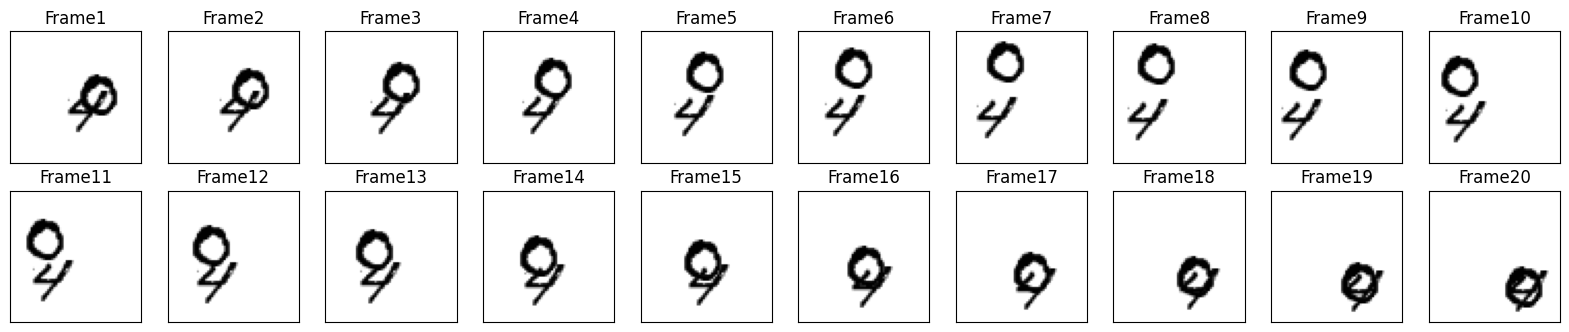

In [13]:
plt.figure(figsize=(20,10))
k=0
for i in range(180,200,1):
    plt.subplot(5,10,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_raw[i,0,:,:], cmap=plt.cm.binary)
    plt.title('Frame'+str(k+1))
    k=k+1
plt.show()

### 3. Analysis on "Sevir_data"

In [ ]:
sevir_data = np.load(r'D:\Tommy\++AI\++datasets\sevir_data\full_nowcast_testing_128_8_3.npz')
print(sevir_data)

In [ ]:
vil_in = sevir_data['vil_in']
print('vil_in shape: ', vil_in.shape)
vil_out = sevir_data['vil_out']
print('vil_out shape: ', vil_out.shape)

datasets above only contains 8+3 frames

### 3.1 Play with Sevir Data

In [14]:
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
#train_data_path = r'D:\Tommy\++AI\++datasets\sevir_data\large_datasets\nowcast_training_256.h5'
train_data_path = r'D:\Tommy\++AI\++datasets\sevir_data\large_datasets\nowcast_training_000.h5'

hf =  h5py.File(train_data_path,'r') 

In [16]:
hf.keys()

<KeysViewHDF5 ['IN_ir069', 'IN_ir107', 'IN_lght', 'IN_vil', 'OUT_vil']>

In [17]:
in_vil_data = hf['IN_vil']
out_vil_data = hf['OUT_vil']

In [18]:
out_vil_data.shape

(5088, 384, 384, 12)

In [19]:
print('IN_ir069: ', hf['IN_ir069'].shape)
print('IN_ir107: ', hf['IN_ir107'].shape)
print('IN_lght: ', hf['IN_lght'].shape)

IN_ir069:  (5088, 192, 192, 13)
IN_ir107:  (5088, 192, 192, 13)
IN_lght:  (5088, 48, 48, 13)


In [ ]:
plt.figure(figsize=(20,10))
n=10
k=0
#plot input 
for i in range(0,13,1):
    plt.subplot(5,10,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(in_vil_data[n,:,:,i])
    plt.title('Frame'+str(k+1))
    k=k+1
#plot output
for i in range(0,12,1):
    plt.subplot(5,10,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(out_vil_data[n,:,:,i])
    plt.title('Frame'+str(k+1))
    k=k+1
plt.show()

### 3.2 Summary
- there are 5 layer in the h5 dataset: ['IN_ir069', 'IN_ir107', 'IN_lght', 'IN_vil', 'OUT_vil']
- **Input layers** contains **13 frames** as input
    - in_vil:    (256, 384, 384, 13)
    - IN_ir069:  (256, 192, 192, 13)
    - IN_ir107:  (256, 192, 192, 13)
    - IN_lght:  (256, 48, 48, 13)
- **output** has only one layer, 12 frames
    - out_vil layer contains 12 frames as target
- in_vil and out_vil are continue frames, total will be 25 frames

### 3.3 New datasets
- concanate in_vil and out_vil as whole, there will be 25 frames, only keep the first 20 frames
- original image size is 256x256, shrink them into 64,64
- the original mnist data shape is: (200000, 1, 64, 64)
- new dataset will be (256,1,64,64)

In [20]:
in_vil_data.shape

(5088, 384, 384, 13)

In [21]:
out_vil_data.shape

(5088, 384, 384, 12)

#### 3.3.1 np concatenate two arrays on last dim

### for large dataset, can't be concatenate directly, make them into small groups
- save every 1000 records into one npy file
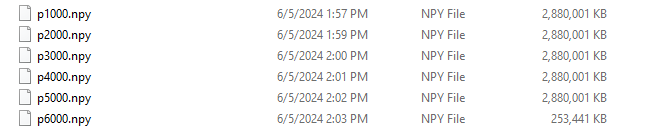

In [44]:
# first 1000 sets with 13 inputs
p_vil = in_vil_data[5000:,:,:,:]
p_vil.shape

(88, 384, 384, 13)

In [45]:
# first 1000 sets output with 12 inputs
po_vil = out_vil_data[5000:,:,:,:7]
po_vil.shape

(88, 384, 384, 7)

In [46]:
p_vils_1 = np.concatenate((p_vil, po_vil), axis=3)
p_vils_1.shape

(88, 384, 384, 20)

In [47]:
np.save(r'D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p6000', p_vils_1)

### Larget Dataset Pre-process

In [54]:
from PIL import Image as im 

In [57]:
newsize = (128, 128)

for d in range(6):
    ff = 'p' + str(int((d+1)*1000))
    oo = 's' + str(int((d+1)*1000))
    path = r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets" + "\\"+ff+".npy"
    print(path)
    b_data = np.load(path)
    num= b_data.shape[0]
    input_raw=[]
    for k in range(num):  
        for s in range(20):
            img = im.fromarray(b_data[k,:,:,s])
            img1 = img.resize(newsize)
            npimg = np.array(img1)
            npimg_norm = npimg/255.0
            #normalize data by dividing 255
            expanded_array = np.expand_dims(npimg_norm, axis=0) # add 1 more dim, make it into (1,64,64)
            input_raw.append(expanded_array)
    total_raw_data = np.array(input_raw)
    np.save( r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets" + "\\"+oo+".npy", total_raw_data)

D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p1000.npy
D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p2000.npy
D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p3000.npy
D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p4000.npy
D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p5000.npy
D:\Tommy\++AI\++datasets\sevir_data\large_datasets\p6000.npy


In [63]:
# merge them into large dataset
ddd1 = np.load(r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets\s1000.npy")
ddd2 = np.load(r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets\s2000.npy")
vils = np.concatenate((ddd1, ddd2), axis=0)
vils.shape

(40000, 1, 128, 128)

In [64]:
ddd2 = np.load(r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets\s3000.npy")
vils1 = np.concatenate((vils, ddd2), axis=0)
vils1.shape

(60000, 1, 128, 128)

In [66]:
ddd1=[]
vils=[]

In [67]:
ddd2 = np.load(r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets\s4000.npy")
vils = np.concatenate((vils1, ddd2), axis=0)
vils.shape

(80000, 1, 128, 128)

In [68]:
np.save( r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets\vils_4000.npy", vils)

In [69]:
train_clips = train_data['clips']
print("Input: \n", train_clips[0,:,:])
print("Ground Truth: \n", train_clips[1,:,:])

Input: 
 [[     0     10]
 [    20     10]
 [    40     10]
 ...
 [199940     10]
 [199960     10]
 [199980     10]]
Ground Truth: 
 [[    10     10]
 [    30     10]
 [    50     10]
 ...
 [199950     10]
 [199970     10]
 [199990     10]]


In [71]:
new_train_clips = train_clips[:,:4000,:]
new_train_clips.shape

(2, 4000, 2)

In [73]:
np.savez(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-train-large.npz', clips=new_train_clips, dims=train_data['dims'] ,input_raw_data=vils )

In [74]:
#Validating data
ddd2 = np.load(r"D:\Tommy\++AI\++datasets\sevir_data\large_datasets\vils_val_1000.npy")

In [76]:
new_val_clips = train_clips[:,:1000,:]
new_val_clips.shape

(2, 1000, 2)

In [77]:
np.savez(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-valid-large.npz', clips=new_val_clips, dims=train_data['dims'] ,input_raw_data=ddd2 )

### Small dataset, Concatenate directly

In [ ]:
# Concatenate along the last dimension (axis=3)
vils = np.concatenate((in_vil_data, out_vil_data), axis=3)
vils.shape

In [ ]:
plt.figure(figsize=(20,10))
n=200
k=0
#plot input 
for i in range(0,25,1):
    plt.subplot(5,10,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vils[n,:,:,i])
    plt.title('Frame'+str(k+1))
    k=k+1

#### 3.3.2 keeps only first 20 frame 

In [ ]:
vils20 = vils[:,:,:,:20]
vils20.shape

In [ ]:
#visual check
plt.figure(figsize=(20,10))
n=10
k=0
#plot input 
for i in range(0,25,1):
    plt.subplot(5,10,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vils[n,:,:,i])
    plt.title('Frame'+str(k+1))
    k=k+1

In [ ]:
vils[0,:,:,0].min()

In [ ]:
from PIL import Image as im 

### This section didn't do normalization on image data
- this made training loss couple of hunderds
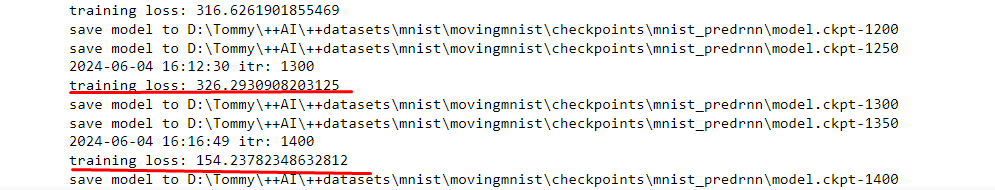

### this section did normalization with array divied by 255, image value becomes 0 to 1

In [ ]:
newsize = (64, 64)
input_raw=[]
for k in range(256):    
    for s in range(20):
        img = im.fromarray(vils[k,:,:,s])
        img1 = img.resize(newsize)
        npimg = np.array(img1)
        npimg_norm = npimg/255.0
        #normalize data by dividing 255
        expanded_array = np.expand_dims(npimg_norm, axis=0) # add 1 more dim, make it into (1,64,64)
        input_raw.append(expanded_array)

In [ ]:
total_raw_data = np.array(input_raw)
print('shape: ', total_raw_data.shape)
print('max: ',total_raw_data.max())

In [ ]:
#visual check
plt.figure(figsize=(20,10))
n=10
k=0
#plot input 
for i in range(0,40,1):
    plt.subplot(5,10,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(total_raw_data[i,0,:,:])
    plt.title('Frame'+str(k+1))
    k=k+1

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(total_raw_data[0,0,:,:])
plt.colorbar()

### 3.4 Split the whole dataset into Train, Val and Test
- first 220 for training
- 30 for validating 
- last 6 for testing


#### 3.4.1 RAW dataset

In [ ]:
train_input_raw_data = total_raw_data[:4400,:,:,:]
val_input_raw_data = total_raw_data[4400:5000,:,:,:]
test_input_raw_data = total_raw_data[5000:5120,:,:,:]

In [ ]:
train_input_raw_data.shape

In [ ]:
val_input_raw_data.shape

#### 3.4.2 train clips data

In [ ]:
train_clips = train_data['clips']
print("Input: \n", train_clips[0,:,:])
print("Ground Truth: \n", train_clips[1,:,:])

- total 220
- get first 220 datasets from train clips

In [ ]:
train_clips.shape

In [ ]:
new_train_clips = train_clips[:,:220,:]
new_train_clips.shape

In [ ]:
print("Input: \n", new_train_clips[0,:,:])
print("Ground Truth: \n", new_train_clips[1,:,:])

#### 3.4.3 val clips data

In [ ]:
new_val_clips = train_clips[:,:30,:]
new_val_clips.shape

In [ ]:
print("Input: \n", new_val_clips[0,:,:])
print("Ground Truth: \n", new_val_clips[1,:,:])

### 4. Create Final npz file
- **clips**: new_train_clips
- **dims**: train_data['dims']   (didn't change)
- **input_raw_data**: train_input_raw_data

In [ ]:
np.savez(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-train.npz', clips=new_train_clips, dims=train_data['dims'] ,input_raw_data=train_input_raw_data )

In [ ]:
np.savez(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-valid.npz', clips=new_val_clips, dims=train_data['dims'] ,input_raw_data=val_input_raw_data )

### 4.1 Reload to check

In [ ]:
train_data = np.load(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-train.npz')
print(train_data['clips'].shape)
print(train_data['dims'].shape)
print(train_data['input_raw_data'].shape)

In [ ]:
train_data = np.load(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-valid.npz')
print(train_data['clips'].shape)
print(train_data['dims'].shape)
print(train_data['input_raw_data'].shape)

### 5. Check on large Datasets

In [10]:
import numpy as np
train_data = np.load(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-valid-large.npz')


In [11]:
cc= train_data['clips']
dims= train_data['dims']
raws = train_data['input_raw_data']

In [12]:
dims[0][1]=128
dims[0][2]=128
dims

array([[  1, 128, 128]])

In [13]:
np.savez(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-valid-large-1.npz', clips=cc, dims=dims ,input_raw_data=raws )

In [16]:
train_data = np.load(r'D:\Tommy\++AI\++datasets\sevir_data\sevir-valid-large-1.npz')
print(train_data['clips'].shape)
print(train_data['dims'].shape)
print(train_data['input_raw_data'].shape)

(2, 1000, 2)
(1, 3)
(20000, 1, 128, 128)


In [17]:
train_data['dims']

array([[  1, 128, 128]])